In [1]:
import pandas as pd

In [2]:
import random

### Rolling a dice 10000 times and finding a probability distribution function curve

In [4]:
L = []
for i in range(10000):
  rv = random.randint(1,6) # random variable between 1 and 6 (both inclusive)
  L.append(rv)

In [5]:
len(L)

10000

In [6]:
L[:5] # first 5 records of dice experiment

[2, 2, 4, 6, 3]

In [8]:
pd.Series(L).value_counts() # total no of occurance of each possible outcome

,count
3,1694
6,1687
1,1682
2,1671
4,1663
5,1603


In [9]:
# calculate the probabilities of occured variable out of all possible outcomes
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()  # (total no of outcome / total no of possible outcome)

<Axes: >

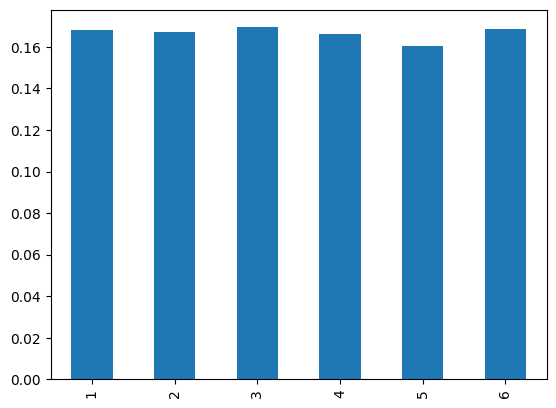

In [12]:
s.plot(kind='bar') # this looks almost like a uniform distribution (each random variable has equal chance of occurance)

### Rolling two dice together and finding a probability distribution function curve

In [13]:
L = []
for i in range(10000):
  a = random.randint(1,6) # random variable of dice 1
  b = random.randint(1,6) # random variable of dice 2

  L.append(a + b)  # storing sum of both random variables as possible outcomes

In [15]:
len(L)

10000

In [16]:
L[:5] # sum will never cross 2 or 12. All possible outcome is between 2 to 12 (both inclusive)

[9, 3, 3, 9, 4]

In [17]:
pd.Series(L).value_counts() # probablilities are not same for every random  variables

,count
7,1635
8,1413
6,1394
5,1151
9,1101
4,838
10,796
11,557
3,541
12,294


In [18]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

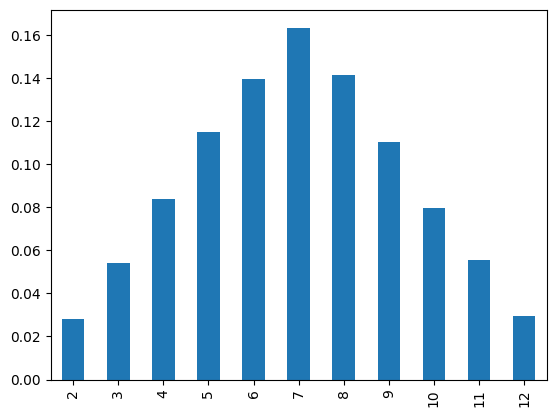

In [19]:
s.plot(kind='bar')

### Cummulative distribution function (cdf)

In [20]:
import numpy as np
np.cumsum(s)

,count
2,0.0280
3,0.0821
4,0.1659
5,0.2810
6,0.4204
7,0.5839
8,0.7252
9,0.8353
10,0.9149
11,0.9706


<Axes: >

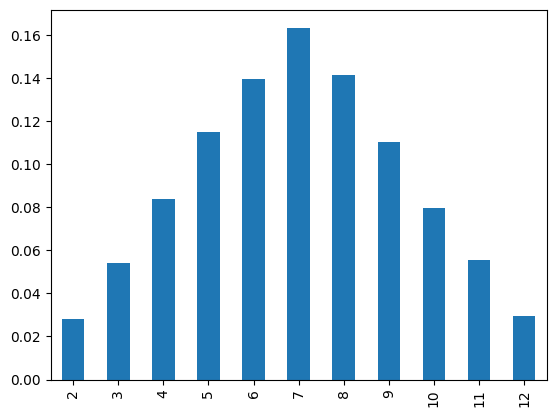

In [21]:
s.plot(kind='bar')

<Axes: >

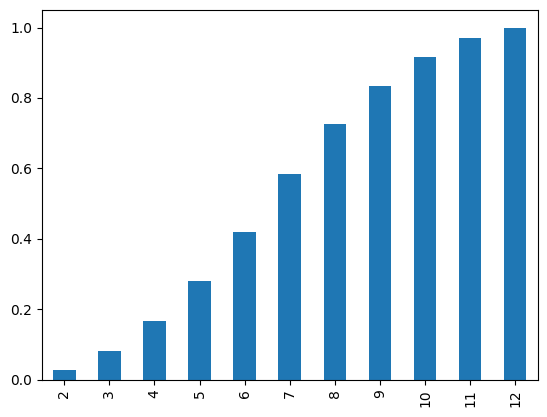

In [22]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

# normal distribution generated sample of 1000 dataset having mean=50 and sd=5 (population parameter)
sample = normal(loc=50, scale=5,size=1000)

In [28]:
sample.mean() # sample mean is close to 50

49.94985300328601

In [29]:
sample.std() # sample std is close to 5

5.031471268606835

(array([  1.,   4.,  28., 108., 217., 250., 224., 127.,  34.,   7.]),
 array([30.34929177, 33.87100489, 37.39271802, 40.91443114, 44.43614427,
        47.95785739, 51.47957052, 55.00128364, 58.52299677, 62.04470989,
        65.56642302]),
 <BarContainer object of 10 artists>)

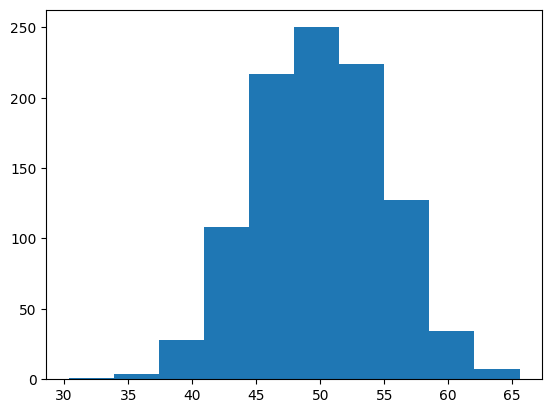

In [30]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [31]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [32]:
print(sample_mean)
print(sample_std)

49.94985300328601
5.031471268606835


In [33]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std) # normal distribution

In [34]:
values = np.linspace(sample.min(),sample.max(),100) # we are generating 100 datapoints between minimum and maximum value of the sample dataset

#### Now we have sample mean (u), sample std , values (x). So we can find the pdf value respective to every value (x).

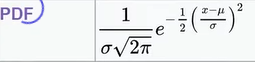

In [35]:
# dist.pdf will calculate pdf of normal distribution function
probabilities = [dist.pdf(value) for value in values]

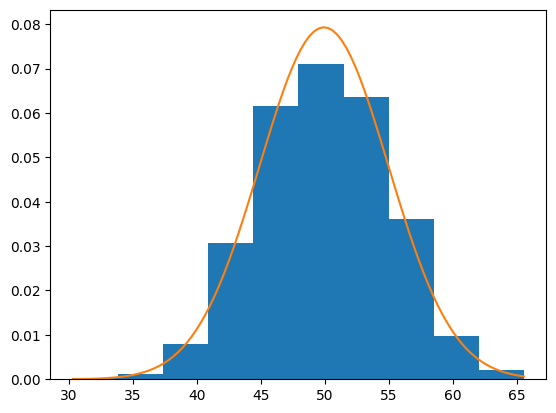

In [36]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True) # density parameter is used to make scale of histogram and lineplot resemble
plt.plot(values,probabilities) # x,pdf

<ipython-input-37-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

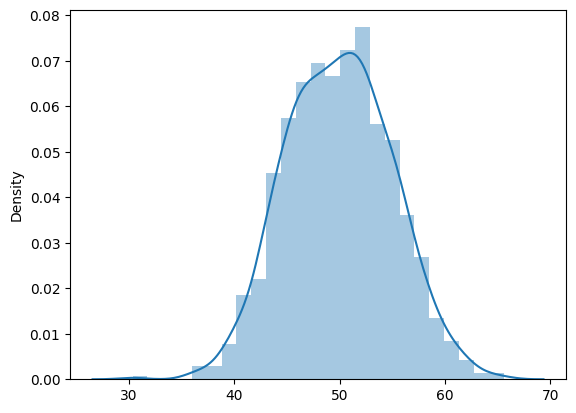

In [37]:
import seaborn as sns
sns.distplot(sample)

# KDE

In [38]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2)) # side by side stacking of 2 normal distribution to make curve bimodal distribution

In [ ]:
sample

array([25.37101508, 23.17282846, 23.19266408, 21.23591442, 19.99585223,
       26.05479481, 24.87635573, 22.5707997 , 24.53847252, 17.19733365,
       15.62925657, 18.86415649, 19.00022272, 18.59746903, 13.39775335,
       14.44637505, 16.50879004, 22.05320241, 16.91522729, 24.87998461,
       25.38985776, 27.60649904, 20.60436429, 20.51424303, 16.82990467,
       16.72124091, 15.82440899, 19.21818665, 22.43898545, 19.05112432,
       21.23007028, 22.35301007, 14.54516627, 13.68508601, 21.93909454,
       16.50490442, 18.52882481, 22.6361671 , 22.06974787, 22.80384678,
       16.02872418, 14.45938868, 19.39410043, 23.67978479, 30.33476097,
       17.75143584, 18.41254234, 22.79632257, 14.69758962, 24.0195535 ,
       19.72296554, 18.34844409, 22.4203516 , 17.6989518 , 23.95721438,
       22.29306234, 13.23571722, 17.7655658 , 26.32972605, 15.46106693,
       21.51581129, 22.84867011, 19.72513232, 24.73696242, 21.79223535,
        8.22274972, 15.86279733, 20.42353259, 25.27510655, 11.79

(array([ 1.,  0.,  0.,  1.,  2.,  0.,  4.,  7.,  7., 11., 14., 19., 23.,
        32., 26., 18., 21., 13., 19., 18., 15., 12., 13., 10.,  8., 12.,
        19., 19., 17., 33., 34., 41., 36., 52., 58., 50., 62., 53., 57.,
        40., 33., 24., 15., 17., 11.,  9.,  6.,  4.,  2.,  2.]),
 array([ 4.01965853,  5.03340034,  6.04714215,  7.06088395,  8.07462576,
         9.08836757, 10.10210938, 11.11585118, 12.12959299, 13.1433348 ,
        14.15707661, 15.17081841, 16.18456022, 17.19830203, 18.21204384,
        19.22578564, 20.23952745, 21.25326926, 22.26701107, 23.28075287,
        24.29449468, 25.30823649, 26.3219783 , 27.3357201 , 28.34946191,
        29.36320372, 30.37694553, 31.39068733, 32.40442914, 33.41817095,
        34.43191276, 35.44565456, 36.45939637, 37.47313818, 38.48687999,
        39.50062179, 40.5143636 , 41.52810541, 42.54184721, 43.55558902,
        44.56933083, 45.58307264, 46.59681444, 47.61055625, 48.62429806,
        49.63803987, 50.65178167, 51.66552348, 52.67926529,

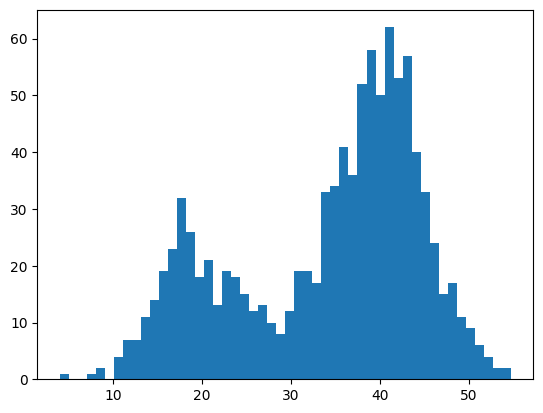

In [39]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [43]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=2, kernel='gaussian')

# convert data to a 2D array (because ML model always works on 2-d dataset)
sample = sample.reshape((len(sample), 1))

model.fit(sample) # fit means kde has calculated all y points that will create pdf curve

KernelDensity(bandwidth=2)

In [44]:
values = np.linspace(sample.min(),sample.max(),100) # x points
values = values.reshape((len(values), 1)) # convert into 2-d points

In [45]:
# calculating probabilities for 100 new datapoints(x)
probabilities = model.score_samples(values) # we got pdf
probabilities = np.exp(probabilities) # At last, we have to calculate the exponential values of all pdf values

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

To avoid this log value we perfom exponent over the result to get desired pdf.

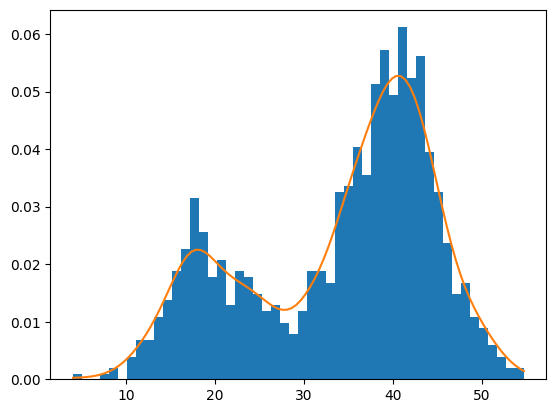

In [46]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

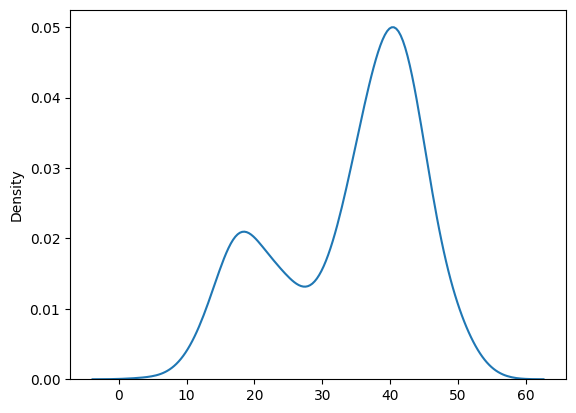

In [47]:
sns.kdeplot(sample.reshape(1000),bw_adjust=1) # kde plot needs 1-d data , providing bandwidth

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

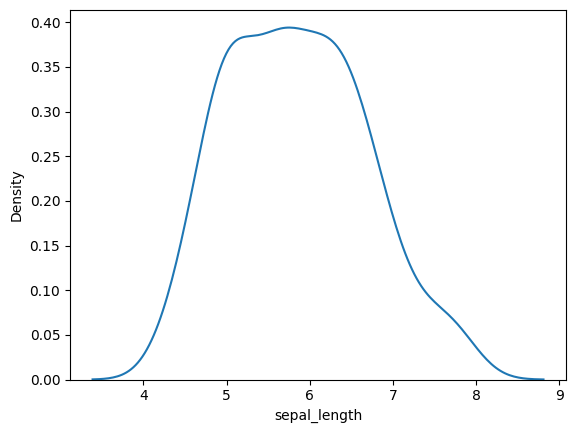

In [8]:
# below curve shows pdf of 'sepal_length'
sns.kdeplot(data=df,x='sepal_length')

<Axes: xlabel='sepal_length', ylabel='Density'>

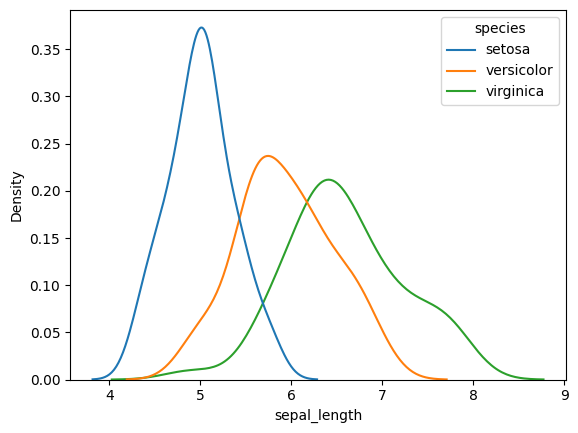

In [4]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

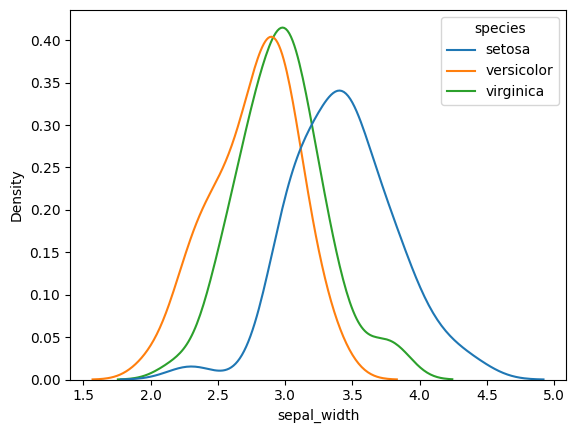

In [5]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

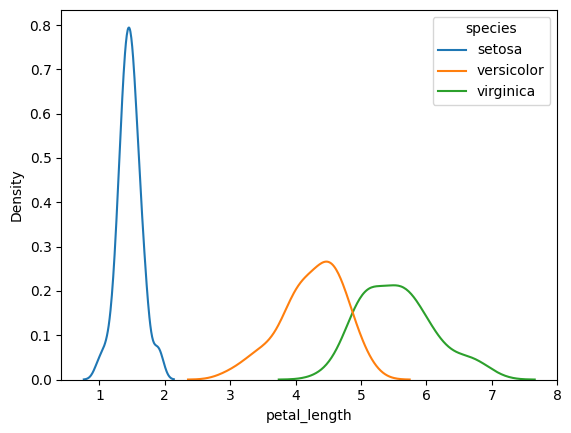

In [6]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

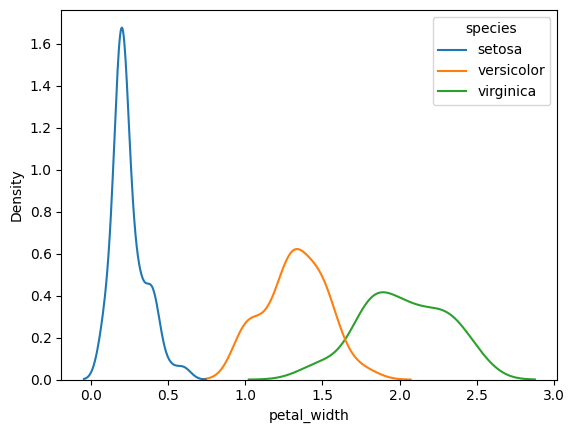

In [7]:
sns.kdeplot(data=df,x='petal_width',hue='species')

### Question : By observing all 4 kde plots above, we have to figure out which 2 features will be useful out of 4 features?

### Ans: We can see petal_length and petal_width these 2 column are useful for observation. Because these 2 features kde plots have clearer plotting of all 3 categories. We can easily interpret that:
- If petal_length is below 2 then it will be setosa flower.
- If 2.3 < petal_length < 5 then it will be versicolor flower (as probability of being versicolor is higher).
- If petal_length is above 5 then it will be virginica flower.
- If petal_width is below 0.75 then it will be setosa flower.

### Other 2 features is not useful in distinction between category of flower.

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

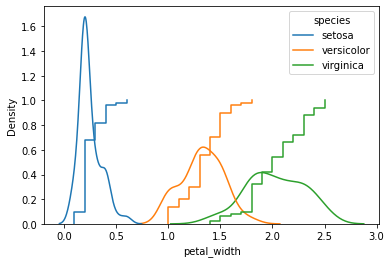

In [ ]:
sns.kdeplot(df['petal_width'],hue=df['species']) # pdf curve
sns.ecdfplot(data=df,x='petal_width',hue='species') # cdf curve

#### KDE plot (pdf) will describe the below information
- If petal_width is below 0.7 then it will be setosa flower.
- If 0.7 < petal_width < 1.7 then it will be versicolor flower (as probability of being versicolor is higher).
- If petal_width is above 1.7 then it will be virginica flower.

#### But CDF curve will tell that whether kde rules is correct or not.

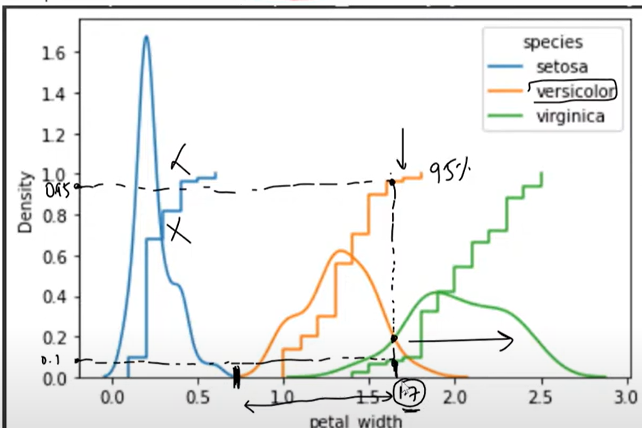

#### After connecting the points we can interpret.
- 95% of versicolor flower are having petal_width <= 1.7
- 10% of virginica flower are having petal_width <= 1.7

- We can say using cdf , that second rule of pdf curve is 95% correct and third rule of pdf curve is 9% correct. That how we can quantify our decision using cdf that were made as per pdf.

In [10]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

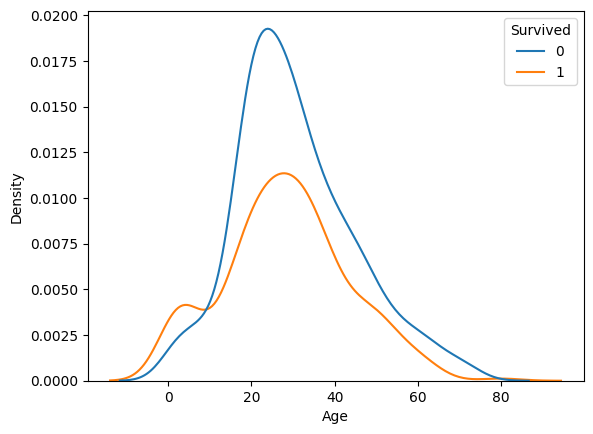

In [15]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

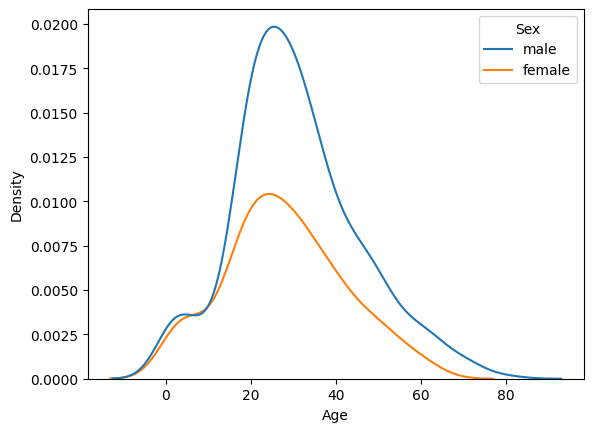

In [12]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

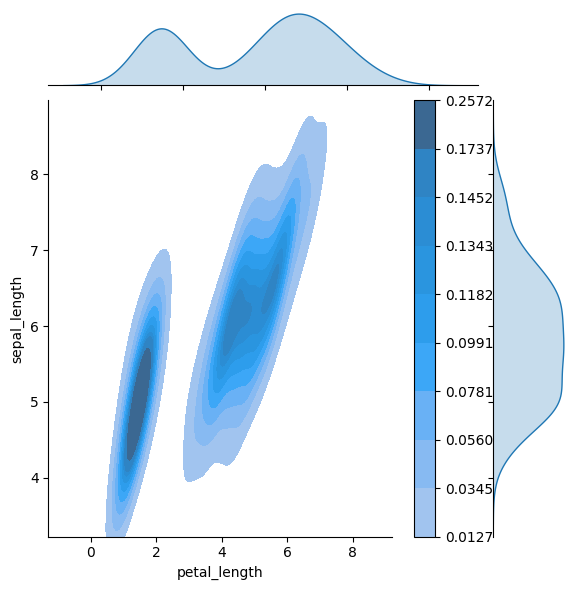

In [16]:
sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

### 2-D contour plot
- Dark blue shows the area where probability density of sepal_length and petal_length is highest.
- It is showing kdeplot (pdf curve) of petal_length and sepal_length individually on top and side of graph.

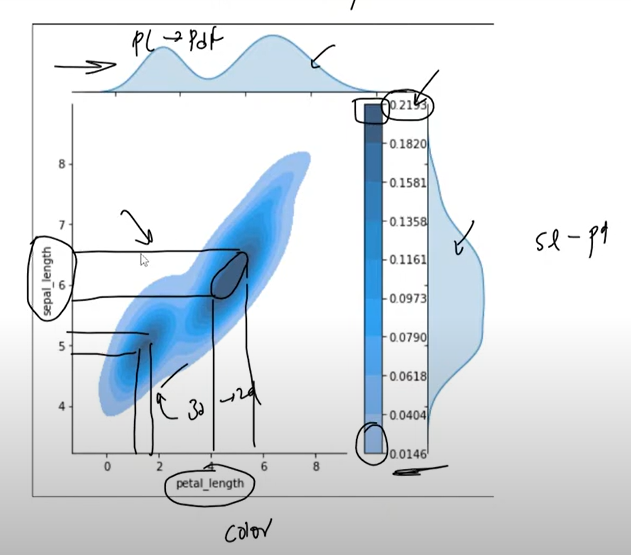

## Standard Normal Distribution

<Axes: xlabel='Age', ylabel='Density'>

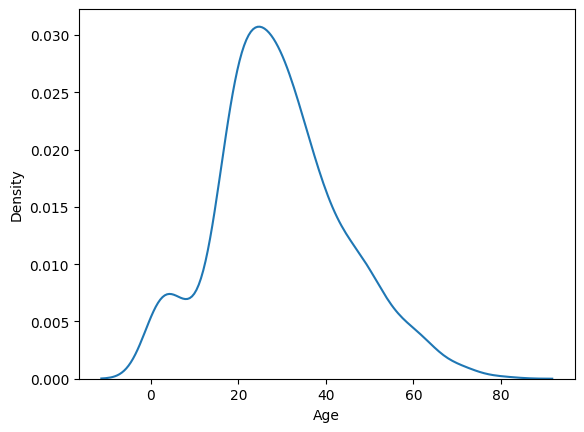

In [29]:
# This is not a perfect normal distribution right now
sns.kdeplot(titanic['Age'])

In [30]:
# mean is not 0
titanic['Age'].mean()

29.69911764705882

In [31]:
# std is not 1
titanic['Age'].std()

14.526497332334042

In [32]:
# normalized data 
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

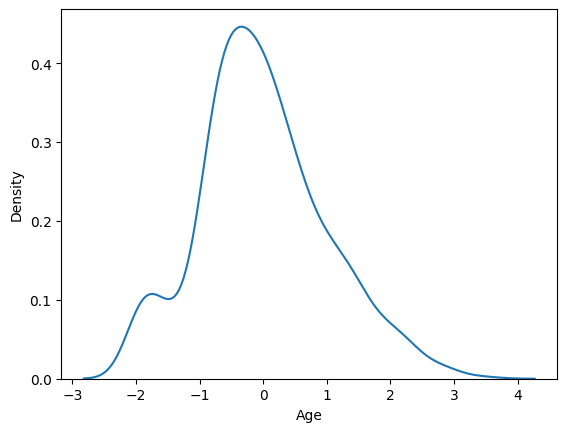

In [33]:
sns.kdeplot(x)

#### Graph is similar as above but we can observe mean is more close to 0 (e^-16) and std is 1 now after normalization. This does not have mean perfectly equal to 0 because we didnot took a perfect normal distribution for normalization. 

In [34]:
x.mean()

2.338621049070358e-16

In [35]:
x.std()

1.0

### skewness

In [23]:
titanic['Age'].skew()

0.38910778230082704

### Outlier detection using normal distribution

In [24]:
titanic['Age'].mean() + 3*titanic['Age'].std() # mean + 3 std value 

73.27860964406094

In [25]:
# point outside this mean + 3 std value will be an outlier
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.880374349943303

In [38]:
# so we find 2 outliers
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S
